In [ ]:
# Llevamos a efecto un entrnamiento de una NN de ejemplo multiclass de imagenes de 
# numeros escritos a mano que van del 0 al 9.

In [3]:
# clasificacion de imagenes de ropa.

# carga de paquetes

import tensorflow as tf

import matplotlib.pyplot as plt

layers = tf.keras.layers

import numpy as np
print('Tensorflow Version ', tf.__version__)

Tensorflow Version  1.13.1


In [8]:
# descargamos la dataset desde tf 

#mnist = tf.keras.datasets.fashion_mnist
#(x_train, y_train), (x_test, y_test) = mnist.load_data()

from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


# Ojo que los datos vienen como imagenes y no como filas (instancias)

11493376/11490434 [==============================] - 4s 0us/step


In [9]:
# aqui ofrecemos otra alternativa para ver los datos 
# Recordemos que tenemos 60,000 instancias de entrenamieto y 10,000 de testeo

from tensorflow.keras.utils import to_categorical
print('Training data shape : ', train_images.shape, train_labels.shape)
print('Testing data shape : ', test_images.shape, test_labels.shape)


Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : 5')

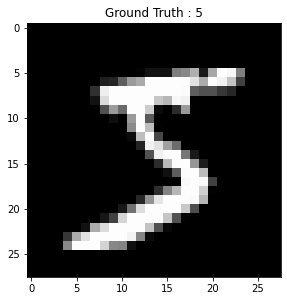

In [10]:

# Find the unique numbers from the train labels
classes = np.unique(train_labels)
classes_num = len(classes)
print('Total number of outputs : ', classes_num)
print('Output classes : ', classes)

# aqui muestra la primera imagen del set de training
plt.figure(figsize=[10,5])
plt.subplot(121)
plt.imshow(train_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_labels[0]))


Text(0.5, 1.0, 'Ground Truth : 7')

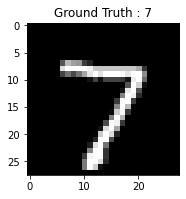

In [11]:
# hago lo mismo para el primera instancia (imagen)  del ser de esteo
plt.subplot(122)
plt.imshow(test_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[0]))



In [12]:
# procesamiento de los datos:

# tenemos imagenes en escala de grisis cuyo valor van de 0 a 255. 
# primero debemos convertir la matriz de 28X28 pixels en un array de 28*28=748 dimensiones.

dim_data = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0], dim_data)
test_data = test_images.reshape(test_images.shape[0], dim_data)



In [13]:
# convertimos los numeros a decimales en escala de 0 a 1

train_data = train_data.astype('float32')
test_data = test_data.astype('float32')


In [15]:
# convertimos las etiquetas (clases) de enteros a categoricos, dado que ese es el formato que
# requiere Keras para problemas de clasificacion.

# codificaciom = one-hot
# "One-hot encoding is a type of boolean representation of integer data. It converts the integer to an array of 
#all zeros except a 1 at the index of the integer".
# por ejemplo, para el 5, seria 0000010000

train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)


In [16]:
# crear la red
# tendremos dos capas escondidas y una capa de salida con 10 neuronas. Cada capa escondida tendra 512 neuronas.

# sequence = nosotros hacemos unstack-up agregando las capas una tars una
# dense: las capas son fully connected por transmision feedforward.
# RELU activation.
# SOFTMAX para multiclass

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dim_data,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(classes_num, activation='softmax'))


Instructions for updating:
Colocations handled automatically by placer.


In [17]:
# configuracion

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
# entrenamiento
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=0,
                   validation_data=(test_data, test_labels_one_hot))


Instructions for updating:
Use tf.cast instead.


In [19]:
# evaluacion

[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

10000/10000 [==============================] - 0s 48us/sample - loss: 8.2894 - acc: 0.4857
Evaluation result on Test Data : Loss = 8.289397931671143, accuracy = 0.48570001125335693


Text(0.5, 1.0, 'Accuracy Curves')

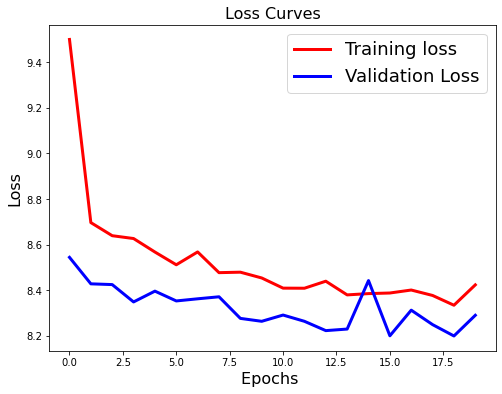

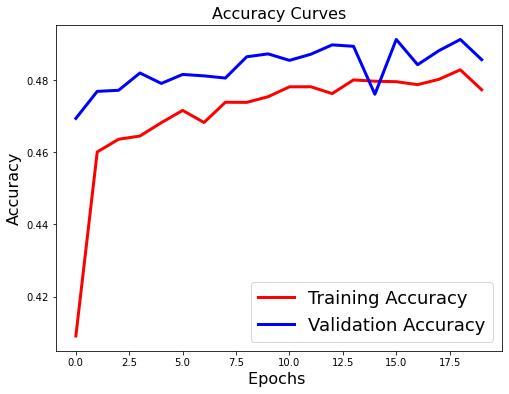

In [21]:
# chequeo de overfitting

#Plot curva loss function
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)


#Plot accuracy
plt.figure(figsize=[8,6]) 
plt.plot(history.history['acc'],'r',linewidth=3.0) 
plt.plot(history.history['val_acc'],'b',linewidth=3.0) 
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18) 
plt.xlabel('Epochs ',fontsize=16) 
plt.ylabel('Accuracy',fontsize=16) 
plt.title('Accuracy Curves',fontsize=16)


# Aunque el accuracy se ve bastante decente, si vemos las curvas de loss y accuracy vemos que 
# el loss de validacion inicialmente deciende, pero de repente sube (seria peor si comienza a subir
# paulatinamente). En este ultimo caso, seria señal de overfitting, lo cual significa que la red ha
# memorizado el set de entrenamiento muy bien, pero no es garantia de que trabaje bien con datos
# no observados.


In [22]:
# Regularizacion

# El overfitting se produce porque los pesos de la red estan muy sesgados hacia el set de entrenamiento.
# Para aminirar este efecto, podemos agregar una capa de DROPOUT.

# esto significa que una fracción de las neuronas son ALEATORIAMENTE  APAGADAS durante el 
# proceso de entrenamiento, reduciendo la dependencia del set de entrenamiento.


from tensorflow.keras.layers import Dropout
model_reg = Sequential()
model_reg.add(Dense(512, activation='relu', input_shape=(dim_data,)))
model_reg.add(Dropout(0.5))
model_reg.add(Dense(512, activation='relu'))
model_reg.add(Dropout(0.5)) #>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>AQUI.
model_reg.add(Dense(classes_num, activation='softmax'))


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [23]:
# volvemos a entrenar la red y volvemos a revisar los graficos.
model_reg.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history_reg = model_reg.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=0,
                            validation_data=(test_data, test_labels_one_hot))



Text(0.5, 1.0, 'Accuracy Curves')

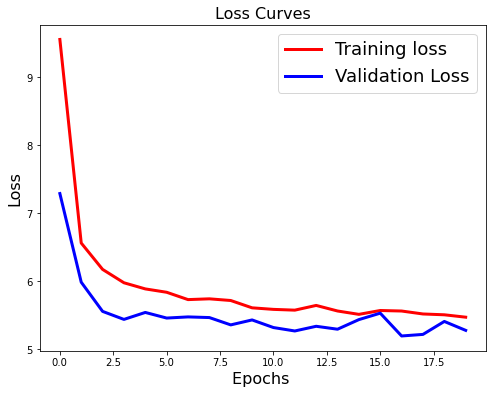

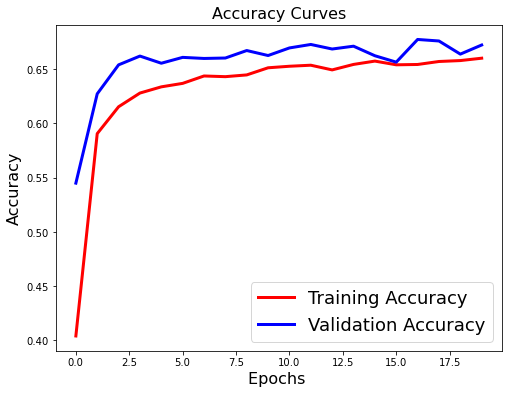

In [25]:
#Plot curva loss

plt.figure(figsize=[8,6])
plt.plot(history_reg.history['loss'],'r',linewidth=3.0)
plt.plot(history_reg.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

#Plot curva accuracy
plt.figure(figsize=[8,6])
plt.plot(history_reg.history['acc'],'r',linewidth=3.0)
plt.plot(history_reg.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)


# la curva de loss no se incrementa
# la diferencia entre accuracy de trining y test ya no es tan alta.

Model prediction: 3


Text(0.5, 1.0, 'Ground Truth : 2')

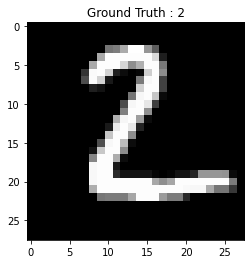

In [26]:
# algunas predicciones

# Hagamos una prediccion a la clase mas probable (que mas se repite)
print("Model prediction: {}".format(model_reg.predict_classes(test_data[[1],:])[0]))
 
# mostrar la imagen
plt.imshow(test_images[1], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[1]))


In [27]:
# veamos las probabilidades de cada clase
model_reg.predict(test_data[[0],:])

#esto no dice que para esta imagen (instance) la probabilidad de que sea un 7 es 1.

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

In [ ]:
# ejercicio.
# puede cambiar el numero de neuronas de la capa escondida y cambiar las funciones de activacion a tanh o sigmoid 
# y ver que pasa.